In [2]:
# Activate virtual environment
# TODO: make script to generate venv
venv = "urbsound8k/bin/activate_this.py"
exec(open(venv).read(), {'__file__': venv})

import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import math
import seaborn as sns
import IPython.display
pi = math.pi

# custom functions
from phaseshift import phasediff

In [5]:
# sound1, FS1 = librosa.load('data/fold1/7383-3-0-0.wav') # dog
# sound1, FS1 = librosa.load('data/fold1/15564-2-0-0.wav') $ crowd
# sound1, FS1 = librosa.load('data/fold1/17913-4-0-1.wav') # construction
sound1, FS1 = librosa.load('data/fold1/19026-1-0-0.wav') # car horn, good ex of phase diff

wind = 2**11 # in samples
step = 2**9 # in samples
rayleigh = FS1/wind
nyquist = FS1/2
step_sec = step/FS1 # in sec

# freqs = [rayleigh*(i+1) for i in range(round(wind/2))]

ft1 = librosa.stft(sound1, window=scipy.signal.hann, n_fft=wind, hop_length=step, center=0)

psd1 = abs(ft1)**2
db1 = librosa.power_to_db(psd1)

phdiff, psd_rect, times, freqs = phasediff(sound1, windsize=wind, stepsize=step, sampfreq=FS1)

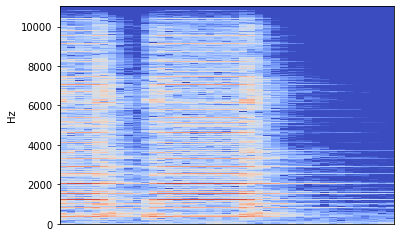

In [3]:
# IPython.display.Audio(data=sound1, rate=FS1)
librosa.display.specshow(db1, y_axis='linear')

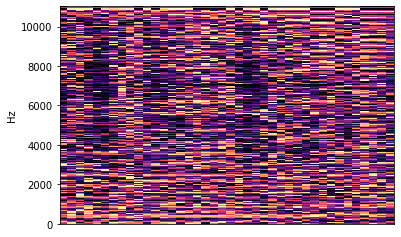

In [4]:
librosa.display.specshow(phdiff, y_axis='linear')

In [3]:
csv = pd.read_csv("data/UrbanSound8K.csv")

In [6]:
FS1

22050

In [30]:
csv[csv["classID"]==0].head(1)["class"].item()

'air_conditioner'

In [41]:
set = {0,1,2,3,3}
print(4 in set)

False


In [48]:
which_folds = {0,1,2}
#csv[csv["fold"] in which_folds]
[1, 2, 3, 1, 4] in which_folds

TypeError: unhashable type: 'list'

In [53]:
def ismember(x,s):
    return x in s

print(ismember(4,{1,2,3}))
print(1 in {1,2,3})

False
True


In [57]:
print(list(map(lambda x: x in {1,2,3},[1,2,3,4,5])))

[True, True, True, False, False]


In [62]:
csv.loc[list(map(lambda x: x in which_folds,csv["fold"])),:]

,slice_file_name,fsID,start,end,salience,fold,classID,class
14,100652-3-0-0.wav,100652,0.0,4.0,1,2,3,dog_bark
15,100652-3-0-1.wav,100652,0.5,4.5,1,2,3,dog_bark
16,100652-3-0-2.wav,100652,1.0,5.0,1,2,3,dog_bark
17,100652-3-0-3.wav,100652,1.5,5.5,1,2,3,dog_bark
64,101415-3-0-2.wav,101415,1.0,5.0,1,1,3,dog_bark
...,...,...,...,...,...,...,...,...
8676,99180-9-0-2.wav,99180,1.0,5.0,1,1,9,street_music
8677,99180-9-0-36.wav,99180,18.0,22.0,1,1,9,street_music
8678,99180-9-0-48.wav,99180,24.0,28.0,1,1,9,street_music
8679,99180-9-0-49.wav,99180,24.5,28.5,1,1,9,street_music
